# Integral transformation of river profiles

*This lesson has been written by Simon M. Mudd at the University of Edinburgh*

*Last update 13/09/2020*

In the last lesson, we looked at some of the drawbacks of using slope-area data to compare the steepness of channels. There is an alterantive way to lok at channel steepness that uses elevation rather than gradient of the channel. 

We start with Morisawa's law:

$S = k_s A^{-\theta}

now remember that $S$ is the same as $dz/dx$, the derivative of elevation. $x$ is the flow distance. If we integrate this equation we get:
    
$z(x) = z(x_b) + \Bigg(\frac{k_s}{{A_0}^{\theta}}\Bigg) \int_{x_b}^{x} \Bigg(\frac{A_0}{A(x)}\Bigg)^{\theta} dx$

where $x_b$ is some arbitrary base level, and $A_0$ is a reference drainage area (this is to ensure the integrand is dimensionless). We almost always set $A_0$ to 1 $m^2$. The integrand seems annoying and messy, but it actually fairly easy to calculate from topographic data (you are just adding drainage area along the length of the channel. It alsohas dimensions length. So we can define a coordinate , $\chi$:

$\chi = \int_{x_b}^{x} \Bigg(\frac{A_0}{A(x)}\Bigg)^{\theta} dx$

which is just that integrand, but it looks nicer in the equation:

$z(x) = z(x_b) + \Bigg(\frac{k_s}{{A_0}^{\theta}}\Bigg) \chi$

Now, have a look at that last eqaution. This is theequation of a line! And the gradient of the line, if $A_0$ = 1 $m^2$ is the channel steepness! 

## Wait, what does that mean?

It means that if you calculate $\chi$ (and we have software for that) you get a **transformed** profile where the gradient of the profile is the channel steepness. And actually, if you do a bunch of fancy mathematics, you can show that this works even if the erosion rates vary in time (see Royden and Perron, 2013).

The `channeltoy` includes the $\chi$ coordinate, so you can see what it looks like:

In [1]:
!pip install channeltoy

In [2]:
import channeltoy as ct
import matplotlib.pyplot as plt
import numpy as np

K is: 5e-05
U is: 0.0002


<Figure size 432x288 with 0 Axes>

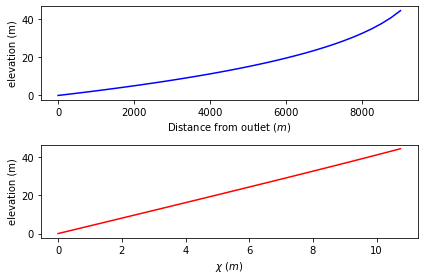

In [3]:
# Make a steady state channel
first_channel = ct.channeltoy(spacing=250, U = 0.0002, K = 0.00005, n=1, m= 0.45)
initial_elevation = first_channel.solve_steady_state_elevation()
initial_chi = first_channel.chi_data
x_locs  = first_channel.x_data

# Create two subplots and unpack the output array immediately
plt.clf()
f, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(x_locs, initial_elevation,'b')
ax2.plot(initial_chi, initial_elevation,'r')


ax1.set_xlabel("Distance from outlet ($m$)")
ax1.set_ylabel("elevation (m)")

ax2.set_xlabel("$\chi$ ($m$)")
ax2.set_ylabel("elevation (m)")

plt.tight_layout()


See how the chi profile is straight? That is because this is a steady state channel. 
We can do a transient channel as well:

K is: 5e-05
U is: 0.0002
U is: 0.0005

Saving this timestep: 0.0
Time is: 20000.0 
Saving this timestep: 25000.0
Time is: 45000.0 
Saving this timestep: 50000.0
Time is: 70000.0 
Saving this timestep: 75000.0
Time is: 95000.0 
Saving this timestep: 100000.0
Time is: 100000.0 

<Figure size 432x288 with 0 Axes>

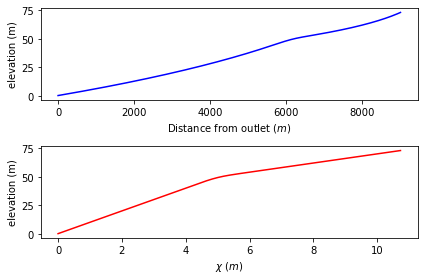

In [4]:
# create a channel
chan = ct.channeltoy(spacing=20, U = 0.0002, K = 0.00005, n=1, m= 0.45)
initial_elevation = chan.solve_steady_state_elevation()

# change the uplift rate
chan.set_U_values(U = 0.0005)

# Run the transient simulation. You can use the start and end time to 
times, elevations = chan.transient_simulation(base_level = 0, dt = 50, 
                                              start_time = 0, end_time = 100001, 
                                              print_interval = 25000)

initial_chi = chan.chi_data
x_locs  = chan.x_data
z = elevations[-1]

# Create two subplots and unpack the output array immediately
plt.clf()
f, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(x_locs, z,'b')
ax2.plot(initial_chi, z,'r')


ax1.set_xlabel("Distance from outlet ($m$)")
ax1.set_ylabel("elevation (m)")

ax2.set_xlabel("$\chi$ ($m$)")
ax2.set_ylabel("elevation (m)")

plt.tight_layout()

See how the $\chi$ profile has two segments with a different gradient? The steeper part represents the section affected by the higher uplift rate in this transient run.

This example illustrates how we can look at $\chi$ profiles to see the relative steepness of channels.

## Some real $\chi$ profiles

Lets first get some data from Xian, and look at it using `geopandas`

In [5]:
import pandas as pd
import geopandas as gpd

In [6]:
df = pd.read_csv("Xian_chi_data_map.csv")
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
gdf = gdf.set_crs(epsg=4326)
print(gdf.head())

    latitude   longitude     chi  elevation  flow_distance  drainage_area  \
0  34.415473  110.287014  3.4148     1092.0        17945.0      4816800.0   
1  34.415743  110.287012  3.4011     1092.0        17915.0      4817700.0   
2  34.416016  110.287336  3.3818     1088.0        17873.0      4820400.0   
3  34.416288  110.287660  3.3625     1084.0        17831.0      4846500.0   
4  34.416561  110.287985  3.3432     1078.0        17788.0      4855500.0   

   source_key  basin_key                    geometry  
0           0          0  POINT (110.28701 34.41547)  
1           0          0  POINT (110.28701 34.41574)  
2           0          0  POINT (110.28734 34.41602)  
3           0          0  POINT (110.28766 34.41629)  
4           0          0  POINT (110.28799 34.41656)  


Now plot the data

<Figure size 432x288 with 0 Axes>

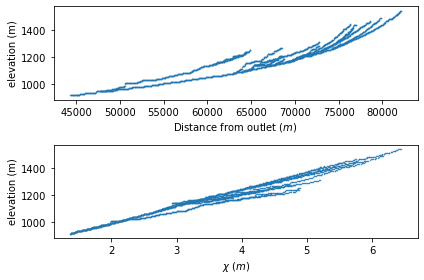

In [7]:
# First lets isolate just one of these basins. They go from 0 to 12
gdf_b1 = gdf[(gdf['basin_key'] == 5)]

# Now make the slope area plot

z = gdf_b1.elevation
x_locs = gdf_b1.flow_distance
chi = gdf_b1.chi

# Create two subplots and unpack the output array immediately
plt.clf()
f, (ax1, ax2) = plt.subplots(2, 1)
ax1.scatter(x_locs, z,s = 0.2)
ax2.scatter(chi, z,s = 0.2)


ax1.set_xlabel("Distance from outlet ($m$)")
ax1.set_ylabel("elevation (m)")

ax2.set_xlabel("$\chi$ ($m$)")
ax2.set_ylabel("elevation (m)")

plt.tight_layout()

We can get rid of the tributaries as well:

<Figure size 432x288 with 0 Axes>

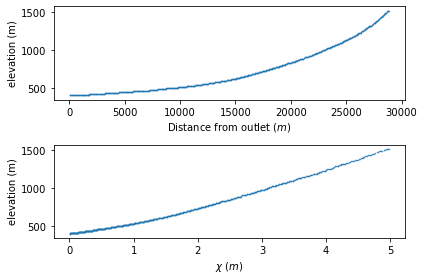

In [8]:
# First lets isolate just one of these basins. They go from 0 to 12
gdf_b1 = gdf[(gdf['basin_key'] == 3)]
min_source = np.amin(gdf_b1.source_key)
gdf_b2 = gdf_b1[(gdf_b1['source_key'] == min_source)]

# Now make the slope area plot

z = gdf_b2.elevation
x_locs = gdf_b2.flow_distance
chi = gdf_b2.chi

# Create two subplots and unpack the output array immediately
plt.clf()
f, (ax1, ax2) = plt.subplots(2, 1)
ax1.scatter(x_locs, z,s = 0.2)
ax2.scatter(chi, z,s = 0.2)


ax1.set_xlabel("Distance from outlet ($m$)")
ax1.set_ylabel("elevation (m)")

ax2.set_xlabel("$\chi$ ($m$)")
ax2.set_ylabel("elevation (m)")

plt.tight_layout()

__Task:__ In the prevous two code snipets, vary the basin number and look for knickpoints